# Understanding rates of changes

## Contents
+ Calculating the average rate of change in a mathematical function
+ Approximating the instantaneous rate of change at a point
+ Picturing how the rate of change is itself changing
+ Reconstructing a function from its rate of change

## Intro
This chapter introduces two of the most important concepts from calculus: the *derivative* and the *integral*. Both of them are operations that work with functions.

> The *derivative* takes a function and gives you another function measuring its rate of change.

> The *integral*, which is the opposite of the *derivative*, takes a function representing a rate of change and gives you back a function measuring the original, cumulative value.

Let's grasp the concepts of rate and cumulative value with an example.

![Oil example](../images/oil_example.png)

+ The sensor on the pipe that measures the amount of oil that is being extracted from the well over the time gives us the *rate of change*.
+ The sensor on the tank, that measures the amount of oil that is currently stored in the tank gives us the *cumulative* value.

There are two main problems that have to do with rates of changes and cumulative values:
+ finding the *rate of change as a function of time* from known cumulative values &mdash; this will be solved using the *derivative*.
+ calculating the cumulative value over the time from a known rate of change &mdash; this will be solved using the *integral*.

For our oil example, we will find a function that gives us the flow rate as a function of time, from the volume over time function `get_flow_rate(volume_function)`, and a function `get_volume(flow_rate_function)` that take the flow rate function over time and returns the volume of oil in the tank over the time function.

## Calculating average flow rate from volume

Let's assume we know the volume of oil in the tank over time, and we are lucky enough to have it encoded as a Python function called `volume(t)`, where $ t $ is the time in hours after a predefined starting point. The function returns the volume in number of barrels *(bbl)*.

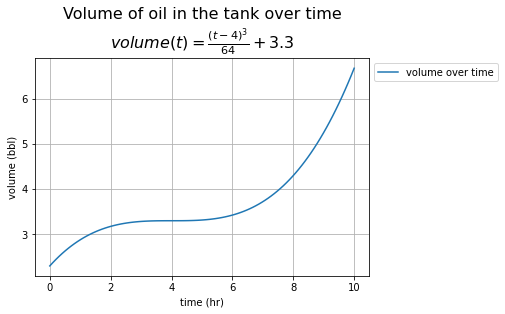

In [14]:
import numpy as np
import matplotlib.pyplot as plt



fig, ax = plt.subplots()
# not needed here
# ax.axhline(y=0, color='black')
# ax.axvline(x=0, color='black')

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $', fontsize=16)

# plotting the volume
def volume(t):
    return (t - 4) ** 3 / 64 + 3.3

ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume over time')

plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



We want to find the flow rate into the tank at any point in time, using the function above as the input.

### Implementing an `average_flow_rate` function

Let's start simple by calculating the flow rate intuitively. We will be writing a function `average_flow_rate(v, t1, t2)` that takes a volume function `v(t)` and a start and end time `t1` and `t2`.
The function should return a number that is the average flow rate into the tank on the time interval, that is, the return will be measuring the number of barrels per hour entering the tank.



The way to calculate the average flow is the following:

$
\text{average flow rate} = \frac{\text{change in volume}}{\text{elapsed time}} \text{, measured in }\frac{barrels}{hour}
$

As we're lucky enough to have a function that returns the volume in the tank $ V $ as a function of time $ t $, we can do:

$
\text{average flow rate} = \frac{V(t2) - V(t1)}{t2 - t1}
$

Note that this is how we calculate rates of change in many other different context as well. For example the *speed* is the rate at which you cover distance with respect to time.

In any case, we can already write the function in Python:

```python
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)
```

Let's use the formula to calculate the average flow rate into the tank between the 4-hour mark and the 9-hour mark.

In [3]:
def average_flow_rate(v, t1, t2):
    return (v(t2) - v(t1))/(t2 - t1)


def v(t):
    return (t - 4) ** 3 / 64 + 3.3

volume_at_beginning = v(4)
volume_at_end = v(9)

print('volume(start)={}'.format(volume_at_beginning))
print('volume(end)={}'.format(volume_at_end))

print('avg_flow_rate={}'.format(average_flow_rate(v, 4, 9)))

volume(start)=3.3
volume(end)=5.253125
avg_flow_rate=0.390625


Note that if we round, we have a change of volume of $ 5.25 - 3.3 = 1.95 \text{ bbl} $.

As we have an interval of 5 hours, the average flow rate should be around $ \frac{1.95 \text{ bbl}}{5 \text{ hours}} = 0.39 \frac{\text{bbl}}{\text{hours}} $

### Picturing the average flow rate with a secant line

Let's interpret what the average flow rate is giving us. In order to do that, let's draw the straight line that goes from `v(4)` to `v(9)`.

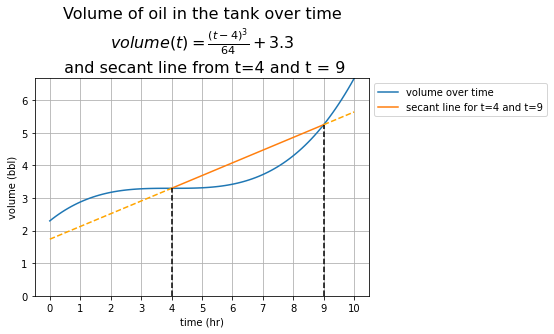

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    return (t - 4) ** 3 / 64 + 3.3

secant_point_start = (4, v(4))
secant_point_end = (9, v(9))

secant_fn = standard_form_fn(secant_point_start, secant_point_end)

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    r'$ volume(t) = \frac{(t - 4)^3}{64} + 3.3 $' 
    '\n and secant line from t=4 and t = 9', fontsize=16)

plt.ylim(0, v(10))
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, volume(ts), label='volume over time')

ts = np.linspace(4, 9, 100)
plt.plot(ts, secant_fn(ts), label='secant line for t=4 and t=9')

# this is just styling
ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
ts = np.linspace(9, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(9))
ts = 9 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



As you can see, the graph is higher for $ t = 9 $ than for $ t = 4 $, which means the volumn of oil increased during that period. This causes the secant line to *slope upward*.

> Mathematically, the *slope* is defined as the change in the vertical coordinate divided by the change in the horizontal coordinate.

Now, we see that the secant goes from $ v(4) $ to $ v(9) $. Therefore, the slope for the secant is then $ \frac{v(9) - v(4)}{9 - 4} $, which happens to be the average flow rate between $ t=4 $ and $ t=9 $.

> the slope of a secant line is the same as the average rate of change of a given function:

$
Slope = \frac{V(t_2) - V(t_1)}{t_2 - t_1}
$

![Secant slope is the average rate of change](../images/secant_slope_and_average_rate_of_change.png)

In [ ]:
### Negative rates of change

The secant line can have a negative slope, as can be seen in the image below.

    def decreasing_volume(t):
        if t < 5:
            return 10 - (t**2)/5
        else:
            return 0.2*(10-t)**2

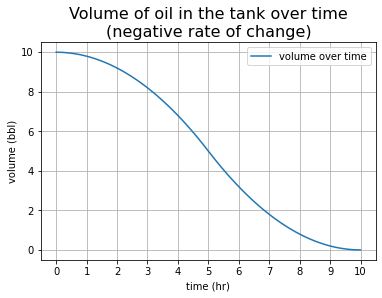

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'
    '(negative rate of change)', fontsize=16)

plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, [v(t) for t in ts], label='volume over time')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



If we perform the same exercise as before, for the time interval between $ t = 0 $ and $ t = 4 $, we can see that:

$
Slope = \frac{V(t2) - V(t1)}{t2 - t1}
$

In [32]:
def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

print('v(0)={}'.format(v(0)))
print('v(4)={}'.format(v(4)))

print('slope=average_rate_flow={}'.format((v(4) - v(0))/(4 - 0)))

v(0)=10.0
v(4)=6.8
slope=average_rate_flow=-0.8


Therefore:

$
Slope=-0.8 \frac{bbl}{hr}
$

Let's see that now the secant has a *downward slope*.

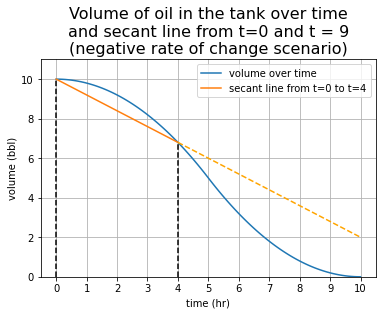

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from my_linear_equations import standard_form_fn

def v(t):
    if t < 5:
        return 10 - (t ** 2) / 5
    else:
        return 0.2 * (10 - t) ** 2

secant_point_start = (0, v(0))
secant_point_end = (4, v(4))

secant_fn = standard_form_fn(secant_point_start, secant_point_end)

fig, ax = plt.subplots()

plt.title(
    'Volume of oil in the tank over time\n'    
    'and secant line from t=0 and t = 9\n'
    '(negative rate of change scenario)', fontsize=16)

plt.ylim(0, v(0) + 1)
plt.xticks(np.arange(0, 11, step=1))

# plotting the volume
ts = np.linspace(0, 10, 100)
plt.plot(ts, [v(t) for t in ts], label='volume over time')

ts = np.linspace(0, 4, 100)
plt.plot(ts, secant_fn(ts), label='secant line from t=0 to t=4')

# this is just styling
ts = np.linspace(4, 10, 100)
plt.plot(ts, secant_fn(ts), color='orange', linestyle='dashed')
vs = np.linspace(0, v(0))
ts = np.zeros(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')
vs = np.linspace(0, v(4))
ts = 4 * np.ones(len(vs))
plt.plot(ts, vs, color='black', linestyle='dashed')


plt.xlabel(r'time (hr)')
plt.ylabel(r'volume (bbl)')
plt.legend(bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()



Therefore:
> the slope of the secant line between two given points gives us the average rate of change of the function

That fact will let us figure out how the flow rate changes over time.